### K 평균 알고리즘 이해
- k평균 : 군집화 알고리즘, 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포이트들을 선택하는 군집화 기법
- 군집 중심점 : 선택된 포인트의 평균 지점으로 이동 -> 이동된 중심점에서 다시 가까운 포인트를 선택 -> 중심점을 평균 지점으로 이동하는 프로세스 반복

1) 군집화 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓는다.
2) 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속됨
3) 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동
4) 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경
5) 다시 중심을 소속된 데이터의 평균 중심으로 이동
6) 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군비화 종료

- KMeans 클래스 제공 : 파라미터는 n_clusters
- fit 또는 fit_transform 메서드를 이용해 수행

꽃 받침, 꽃잎의 길에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해 보고 이를 분류값과 비교해 보기

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
#더 편리한 데이터 핸들링을 위해 DataFrame으로 변화
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
#붓꽃 데이터 세트를 3개 그룹으로 군집화
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
#실제 붓꽃 품종의 분류 값과 얼마나 차이가 나는지 군집화 효과적으로 됐는지 확인
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
#붓꽃 데이터 세트의 군집화를 시각화
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


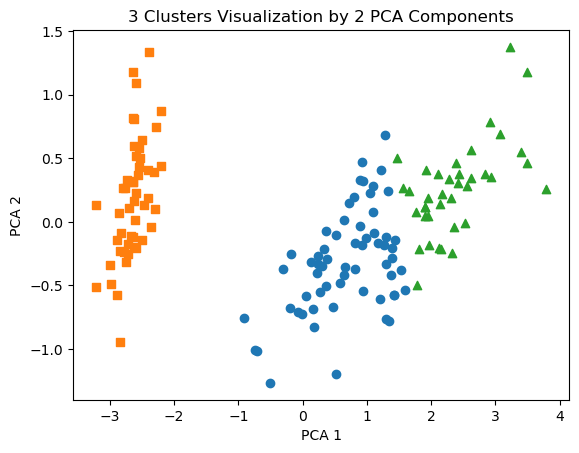

In [6]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

#### 군집화 알고리즘 테스트를 위한 데이터 생성
-군집화용 데이터 생성기 : make_blobs() & make_classification()
-> 여러개의 클레스에 해당하는 데이터 세트를 만듦

-make_blobs() : 개별 군집의 중심점과 표준 편차 제어 기능 추가
-make_classification() : 노이즈를 포함한 데이터를 만드는데 유용하게 사용할 수 있음
-> 분류용도로도 테스트 데이터 생성이 가능

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target 값의 분포를 확인
unique, counts=np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [12]:
import pandas as pd
clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


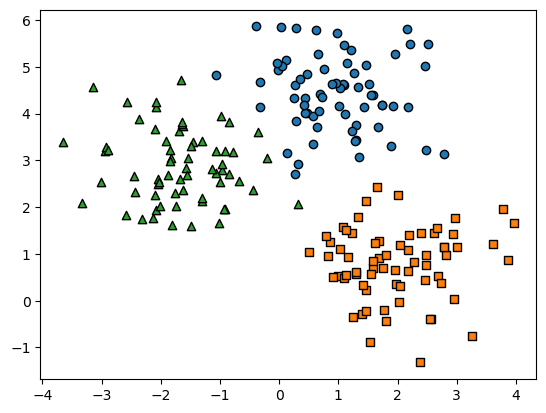

In [13]:
target_list=np.unique(y)
#각 타깃별 산점도의 마커 값
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
#target==0, target==1, target==2로 scatter plot을 marker 별로 생성
for target in target_list:
    target_cluster=clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target])
plt.show()

C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_19916\4270178326.py:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',


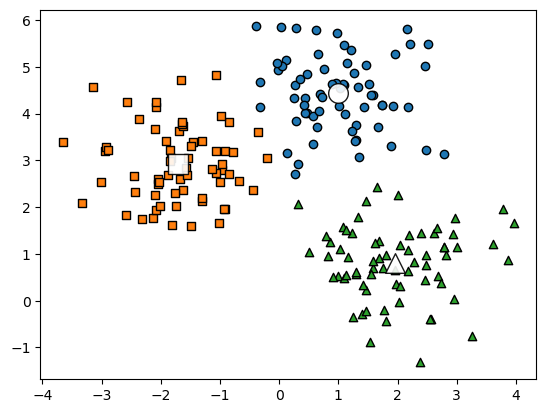

In [14]:
#KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

#군집된 label 유형 별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster=clusterDF[clusterDF['kmeans_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label])

    #군집 별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
              alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
              marker=''%label)
plt.show()

In [15]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: count, dtype: int64


### 군집평가
- 군집화는 분류와 유사하지만 성격이 다름

실루엣 분석
- 군집화 평가 분석
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
- 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다
- 실루엣 계수를 기반으로 함
- 실루엣 계수 : 개별 데이터가 가지는 군집화 지표

좋은 군집화가 되려면 필요한 조건
1) 전체 실루엣의 평균값이 0에서 1사이의 값을 가진다.
2) 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다.

In [16]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score=silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [17]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

def visualize_silhouette(max_k, X):
    """
    This is a hypothetical function to visualize silhouette scores
    for different numbers of clusters.
    """
    for n_clusters in max_k:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=cluster_labels, cmap=plt.cm.nipy_spectral)

        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature 1")
        ax2.set_ylabel("Feature 2")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      f"with n_clusters = {n_clusters}"),
                     fontsize=14, fontweight='bold')
        plt.show()

In [21]:
#visualize_silhouette([2,3,4,5], X_features)

C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.7049787496083262


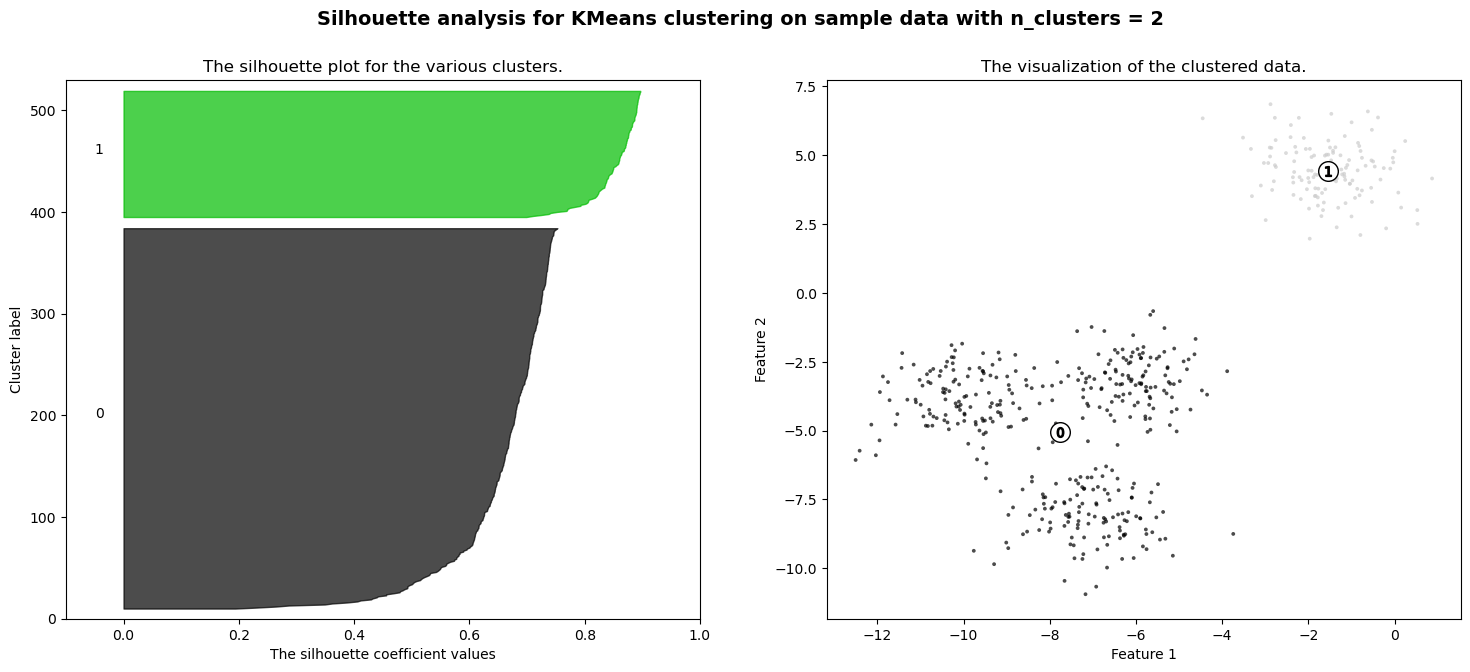

C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.5882004012129721


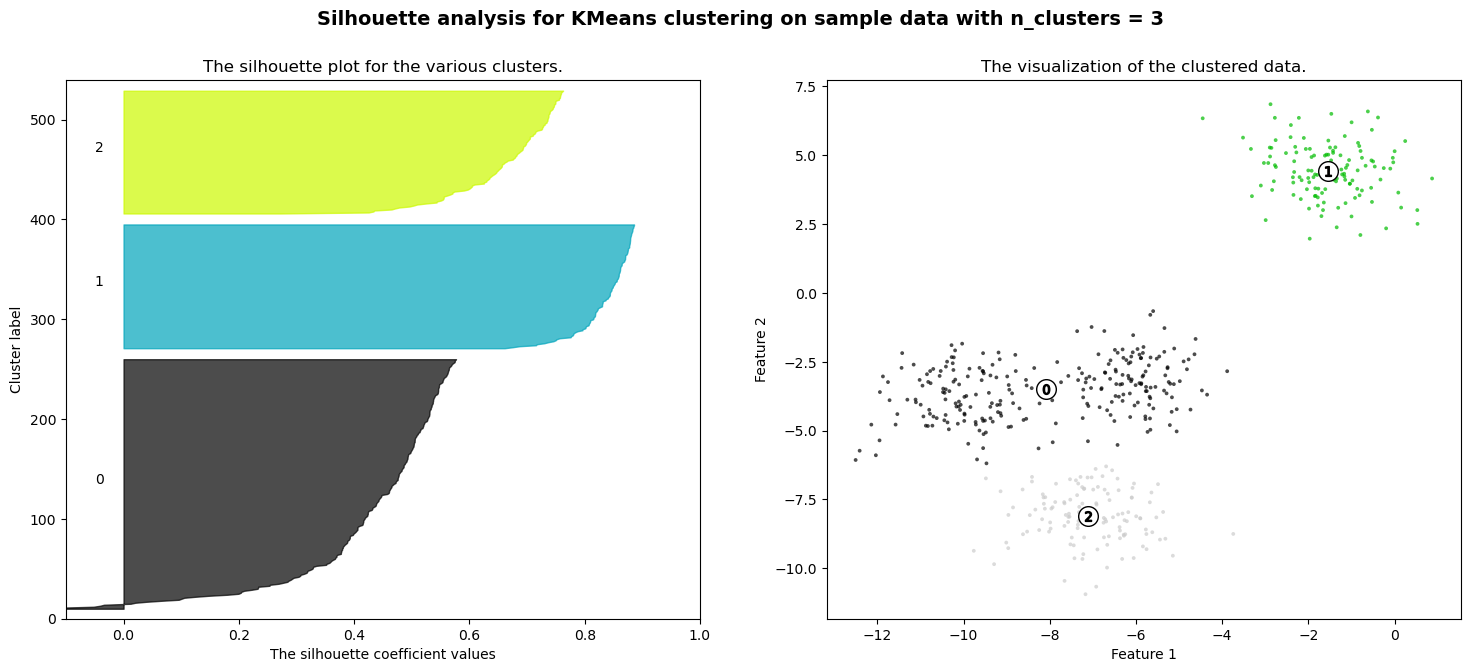

C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.6505186632729437


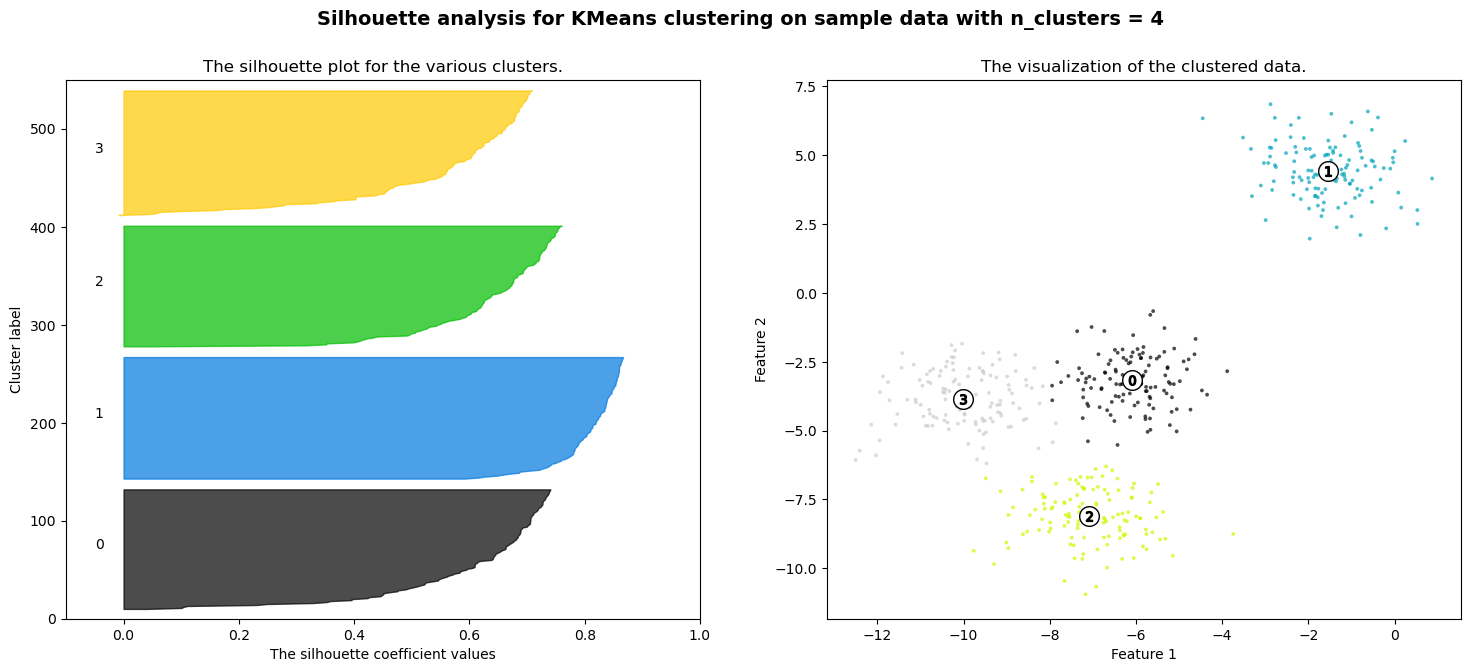

C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.56376469026194


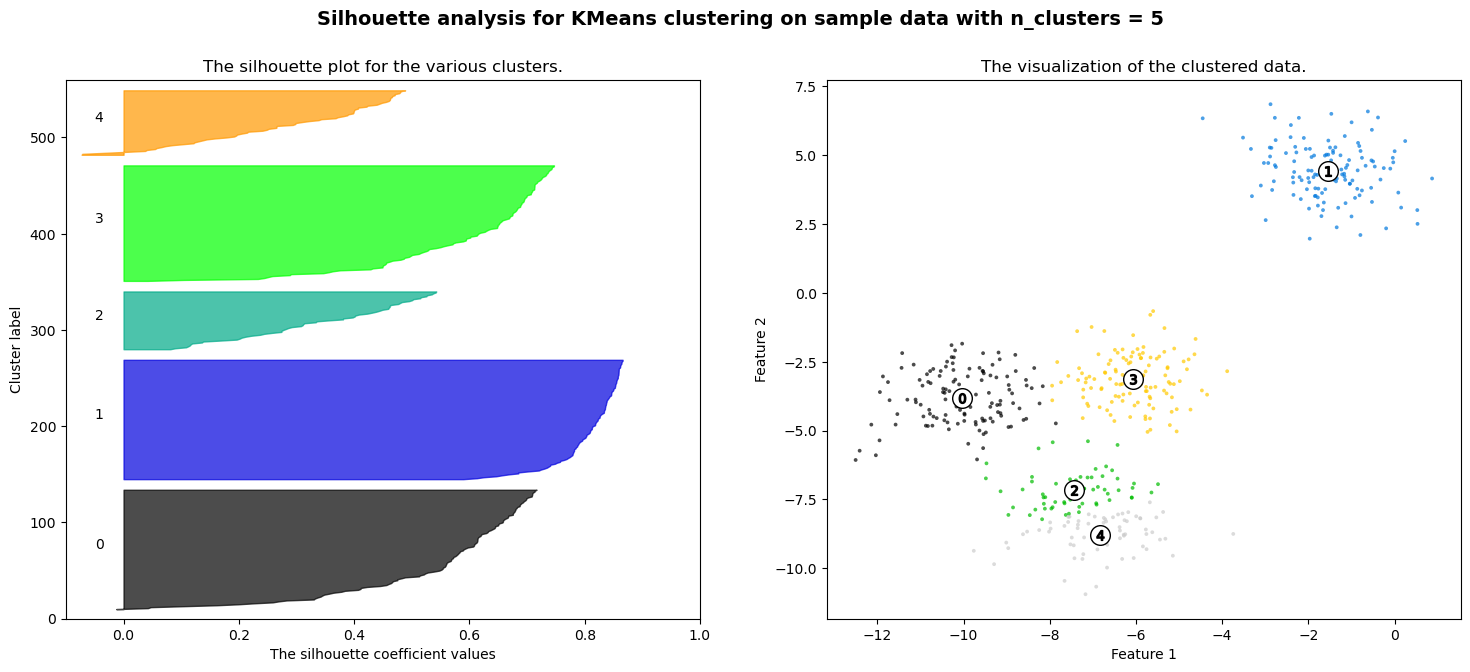

In [22]:
from sklearn.datasets import make_blobs
X, y=make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
            center_box=(-10.0, 10.0), shuffle=True, random_state=1)

#군집 개수가 2개, 3개, 4개, 5개일 때 군집 별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.6810461692117462


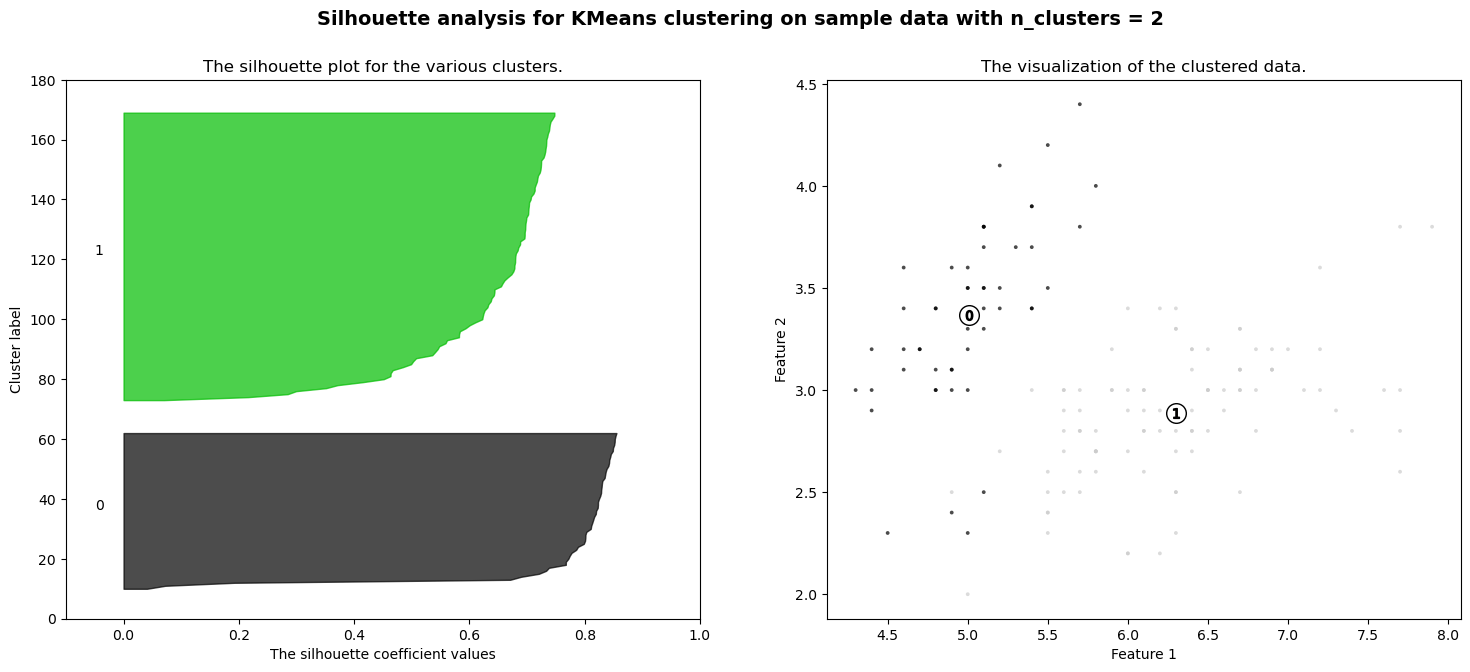

C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.5528190123564095


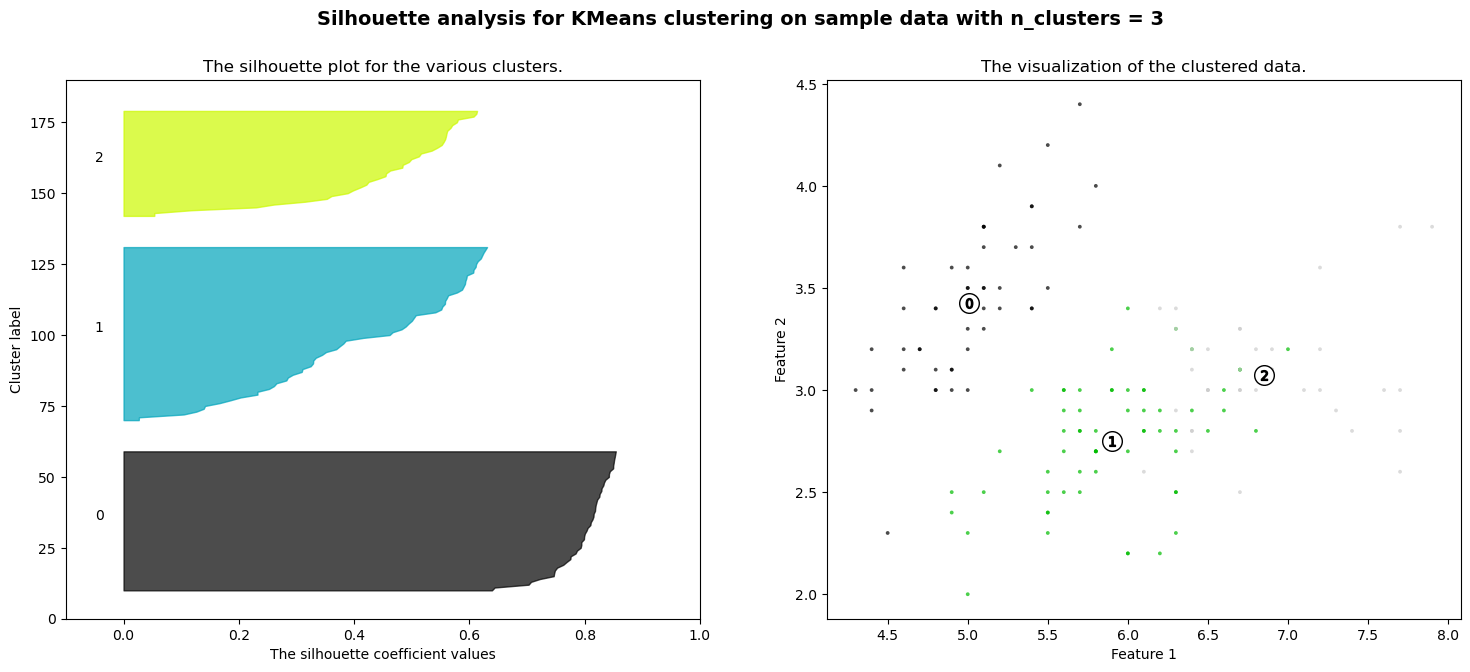

C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.49805050499728737


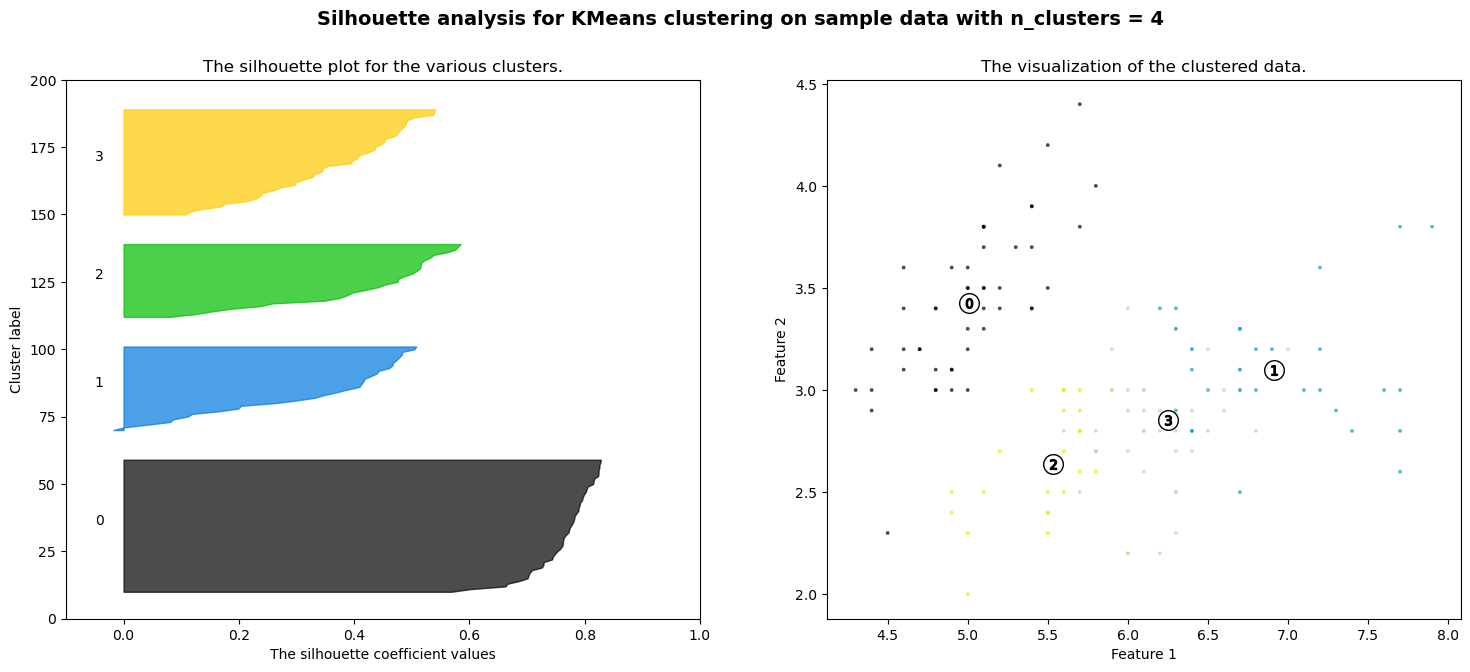

C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.48874888709310566


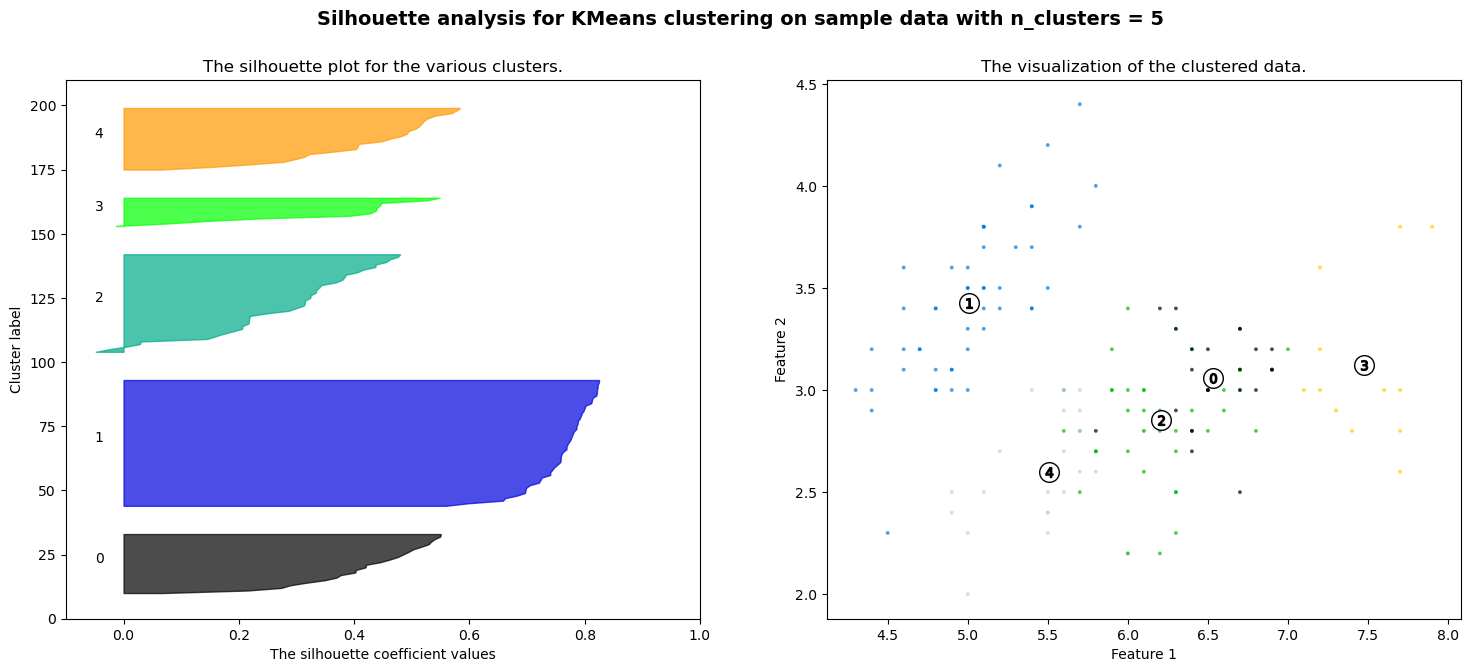

In [23]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)